### 목표 설정
- 손 글씨 숫자(0~9)를 분류하는 모델을 만들어보자
- 선형 분류 모델의 불확실성에 대해 알아보자(다른 분류도 살펴보자.)
- 이미지 데이터에 대한 형태를 이해해보자.

In [1]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### 데이터 확보
- digit_train 데이터 불러오기

In [2]:
digit = pd.read_csv('./data/digit_train.csv')

In [3]:
#데이터 확인
# 주의점 : 데이터가 너무 크다. 그대로 불러오면 메모리가 버티지 못한다
# head() 함수를 이용해서 데이터의 형태를 알아보자
digit.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
digit.shape

(42000, 785)

### EDA

In [5]:
# 하나의 데이터를 뽑아와서 데이터의 구조를 살펴보자
img0 = digit.iloc[0, 1:]


In [6]:
# 뽑아온 데이터의 최대 값과 최소 값을 알아보자
print(img0.max())
print(img0.min())

255
0


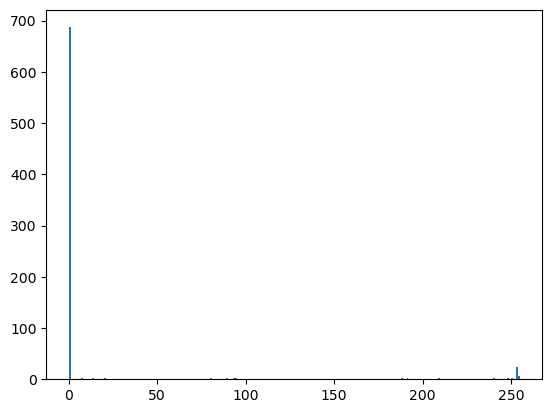

In [7]:
# 데이터의 분포를 알아보기 위해 히스토그램을 그려보자
plt.hist(img0, bins=255)
plt.show()

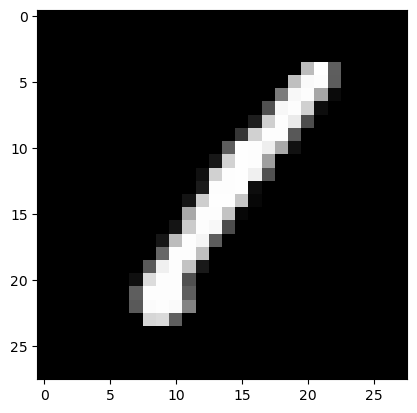

In [8]:
# 실제 데이터 출력해보기
plt.imshow(img0.values.reshape(28, 28), cmap = 'gray')
plt.show()
# 검정색은 0이었다.흰색은 255였다.
# 히스토그램에서 중간 부분의 작은 데이터들은 경계선을 표시하는 것 같다.

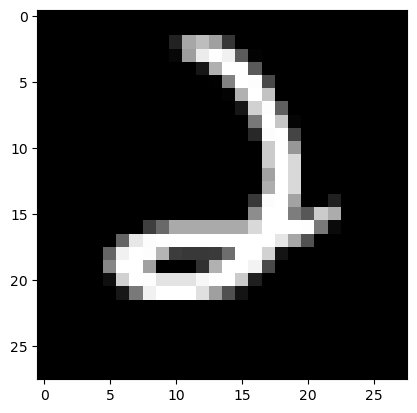

In [9]:
# 하나의 데이터를 뽑아와서 데이터의 구조를 살펴보자
img0 = digit.iloc[35000, 1:]
# 실제 데이터 출력해보기
plt.imshow(img0.values.reshape(28, 28), cmap = 'gray')
plt.show()

### 데이터 추출
- 현재 데이터는 양이 너무 많다.
- 실습의 편의성을 위해서 우리가 5000개의 데이터를 뽑아보자

In [10]:
X = digit.iloc[0:5000, 1:]
y = digit.iloc[0 : 5000, 0]
print(X.shape)
print(y.shape)

(5000, 784)
(5000,)


In [11]:
# 데이터 분할 작업 필요
# train_test_split을 이용해서 데이터를 분할해주자
# 1. 모듈 불러오기
from sklearn.model_selection import train_test_split

In [12]:
# 2. 모듈 사용해서 4등분 해주기(테스트 사이즈 30개, 랜덤 시드 값 9)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=9)

In [13]:
# 3. 데이터 분할 확인하기
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 784), (1500, 784), (3500,), (1500,))

In [14]:
# 모델 import
from sklearn.linear_model import LogisticRegression

In [15]:
# 모델 객체 생성
logi = LogisticRegression() # 기본 모델 이용

In [16]:
# 모델 학습
logi.fit(X_train, y_train)

C:\Users\user04\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
# 모델 예측
pre = logi.predict(X_test)
pre

array([8, 5, 9, ..., 5, 7, 6], dtype=int64)

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
# 교차검증 모듈 불러오기
from sklearn.model_selection import cross_val_score
# 교차 검증
result = cross_val_score(logi, X_train, y_train, cv = 5)
print(result)
print(result.mean())

[0.87142857 0.89714286 0.87714286 0.87285714 0.87714286]
0.8791428571428572


In [20]:
# 모델평가
logi.score(X_test, y_test)

0.878

### 데이터 스케일링
- 모델의 안정성과 성능을 끌어올리기 위해서 데이터 스케일링 진행!
- 분류모델이기 때문에 상대적으로 더 어울리는 스탠다드 스케일링 작업을 진행

In [21]:
# 스케일링 모듈 불러오기
# 1. standard scaler
from sklearn.preprocessing import StandardScaler
#2. MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [22]:
# 모듈이 같은 위치에 존재할 때는 콤마를 통해 여러 모듈을 불러올 수 있다.
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [23]:
#스켕일러 객체 생성
ss_scale = StandardScaler()
mm_scale = MinMaxScaler()

In [24]:
# 스케일러 학습
# 1. 스탠다드 스케일러 학습
ss_scale.fit(X_train)
# 2. MinMax스켕이러 학습
mm_scale.fit(X_train)

MinMaxScaler()

In [25]:
# 1. 스탠다드 스켕일러를 통한 변환 진행하기
X_train_ss = ss_scale.transform(X_train)
X_test_ss = ss_scale.transform(X_test)

(array([114., 516.,  15., 112.,  20.,   2.,   3.,   1.,   0.,   1.]),
 array([-1.14479403, -0.44818888,  0.24841628,  0.94502143,  1.64162658,
         2.33823173,  3.03483688,  3.73144203,  4.42804718,  5.12465233,
         5.82125749]),
 <BarContainer object of 10 artists>)

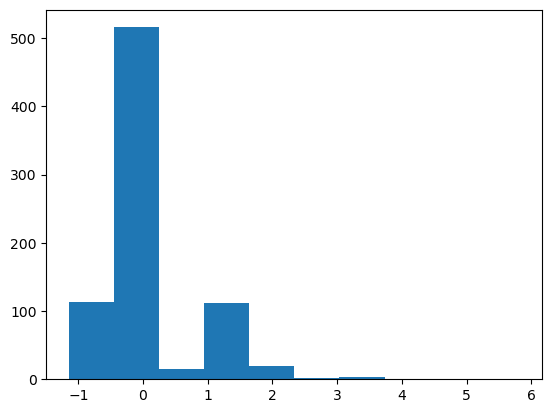

In [26]:
# 히스토그램
plt.hist(X_train_ss[0])

In [27]:
# 1. MinMaxScaler를 통한 데이터 스케일링 변환
X_train_mm = mm_scale.transform(X_train)
X_test_mm = mm_scale.transform(X_test)

(array([616.,   5.,   4.,   2.,   6.,   9.,   6.,   2.,  16., 118.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

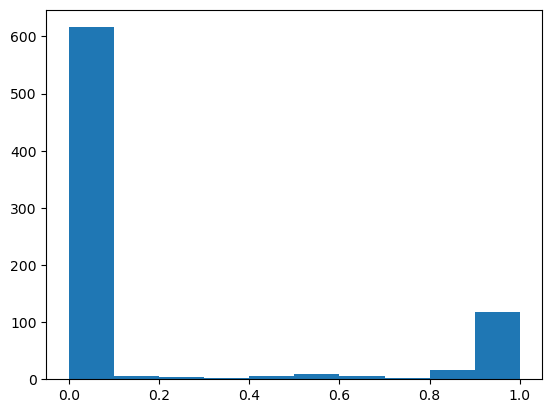

In [28]:
# 히스토그램
plt.hist(X_train_mm[0])

In [32]:
from sklearn.model_selection import cross_val_score
# 스켕일링이 진행된 데이터를 가지고 모델을 학습
# 모델 객체 생성
logi_ss = LogisticRegression()
logi_mm = LogisticRegression()

In [33]:
# 스탠다드 스케일링 데이터 학습
logi_ss.fit(X_train_ss, y_train)

LogisticRegression()

In [34]:
# 스탠다드 스케일링 데이터 교차검증
res = cross_val_score(logi_ss, X_train_ss, y_train, cv = 5)
print(res)
print(res.mean())

[0.86857143 0.89714286 0.88571429 0.88428571 0.89285714]
0.8857142857142858


In [36]:
# 스탠다드 스케일링 데이터 모델 평가
logi_ss.score(X_test_ss, y_test)

0.8873333333333333

In [38]:
# MinMax 스케일링 데이터 학습
logi_mm.fit(X_train_mm, y_train)

LogisticRegression()

In [39]:
# MinMax 스케일링 데이터 교차검증
res = cross_val_score(logi_mm, X_train_mm, y_train, cv = 5)
print(res)
print(res.mean())

[0.88714286 0.91       0.89714286 0.87714286 0.89142857]
0.8925714285714286


In [40]:
# MinMax 스케일링 데이터 모델평가
logi_mm.score(X_test_mm, y_test)

0.8953333333333333

In [ ]:
    () ()
   (^ㅅ^)
ㅇ-(    )-ㅇ
    ()()
    -  -
    -루팡다녀감-

### knn, tree 모델 사용해보기

In [41]:
# 모델 import
from sklearn.neighbors import KNeighborsClassifier #knn 모델
from sklearn.tree import DecisionTreeClassifier

In [42]:
# 모델 객체 생성
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()

In [45]:
# 모델 학습
knn_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
# 모델 평가
knn_model.score(X_test,y_test)

0.922

In [47]:
tree_model.score(X_test, y_test)

0.7493333333333333

### 분류의 불확실성
- 분류가 진행되고 있다. 어떤 방법으로 분류를 해내는 걸까?

In [48]:
# predict_proba() : 분류를 진행할 때 각 정답별 확률 정보를 표시해주는 함수
# 각각의 값은 0~1 사이의 정수 값으로 표시, 전체 합은 1을 넘지 않음 -> 1
knn_model.predict_proba(X_test[100:200])

array([[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ],
       [0.2, 0. , 0. , 0.4, 0. , 0.4, 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.4, 0.4, 0. , 0. , 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0.2, 0. , 0. , 0.2, 0. , 0. , 0.6, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ],
       [0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. 

In [49]:
tree_model.score(X_test, y_test)

0.7493333333333333

In [50]:
knn_model.score(X_test,y_test)

0.922

In [51]:
logi.predict_proba(X_test[100:200])

array([[1.00000000e+000, 5.27109809e-089, 1.24959978e-050,
        3.44237787e-054, 9.09199287e-085, 1.47039773e-045,
        1.70757363e-074, 1.69438062e-077, 8.27063020e-048,
        7.81248702e-073],
       [1.04691014e-044, 3.59242053e-048, 1.54165130e-056,
        5.32115193e-046, 2.59820458e-040, 2.18439331e-039,
        2.82477279e-072, 9.99999997e-001, 4.37862730e-029,
        3.16902382e-009],
       [3.22545599e-047, 9.99999999e-001, 5.43824016e-010,
        4.26730646e-013, 4.54786396e-032, 8.22168594e-036,
        1.41550681e-040, 9.21194335e-020, 8.37325847e-012,
        3.68321292e-021],
       [8.15647760e-062, 1.85247900e-059, 1.83167087e-037,
        5.44030474e-070, 6.79896695e-016, 5.71214458e-033,
        1.00000000e+000, 1.32858366e-048, 3.04505241e-040,
        6.33793566e-038],
       [1.26524299e-049, 2.80421758e-022, 4.00962636e-014,
        9.99999995e-001, 1.02924795e-028, 4.60568015e-014,
        1.15809197e-036, 1.95410634e-052, 4.56228575e-009,
        1.3

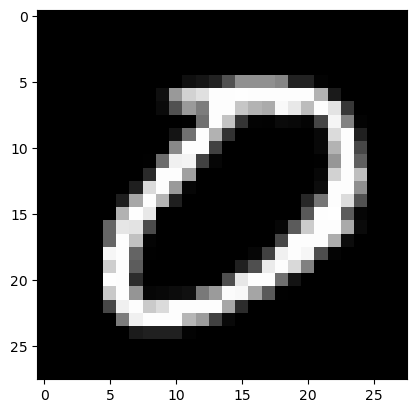

In [52]:
img0 = X_test.iloc[100]
plt.imshow(img0.values.reshape(28, 28), cmap = 'gray')
plt.show()